# Import Modules

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

# TensorFlow ≥2.0 is required
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

TensorFlow 2.x selected.


# Initializers

In [2]:
# 내장된 initializer

[name for name in dir(keras.initializers) if not name.startswith("_")]

['Constant',
 'GlorotNormal',
 'GlorotUniform',
 'Identity',
 'Initializer',
 'Ones',
 'Orthogonal',
 'RandomNormal',
 'RandomUniform',
 'TruncatedNormal',
 'VarianceScaling',
 'Zeros',
 'constant',
 'deserialize',
 'get',
 'glorot_normal',
 'glorot_uniform',
 'he_normal',
 'he_uniform',
 'identity',
 'lecun_normal',
 'lecun_uniform',
 'ones',
 'orthogonal',
 'serialize',
 'zeros']

In [3]:
# initializer 세팅 방법

keras.layers.Dense(10, activation="relu", kernel_initializer="he_normal")

# activation Funtions

In [4]:
# 내장된 activation Funtions

[m for m in dir(keras.activations) if not m.startswith("_")]

['deserialize',
 'elu',
 'exponential',
 'get',
 'hard_sigmoid',
 'linear',
 'relu',
 'selu',
 'serialize',
 'sigmoid',
 'softmax',
 'softplus',
 'softsign',
 'tanh']

In [5]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]


4423680/4422102 [==============================] - 0s 0us/step


In [0]:
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, kernel_initializer="he_normal"),
    keras.layers.ReLU(),
    keras.layers.Dense(100, kernel_initializer="he_normal"),
    keras.layers.ReLU(),
    keras.layers.Dense(10, activation="softmax")
])

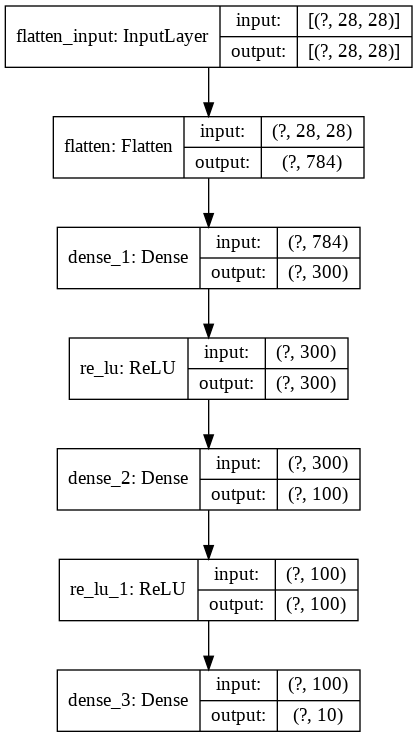

In [7]:
keras.utils.plot_model(model, show_shapes=True)

In [0]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

In [9]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 7s 121us/sample - loss: 1.3460 - accuracy: 0.6200 - val_loss: 0.9246 - val_accuracy: 0.7170
Epoch 2/10
55000/55000 [==============================] - 6s 111us/sample - loss: 0.8200 - accuracy: 0.7363 - val_loss: 0.7317 - val_accuracy: 0.7602
Epoch 3/10
55000/55000 [==============================] - 6s 111us/sample - loss: 0.6973 - accuracy: 0.7698 - val_loss: 0.6520 - val_accuracy: 0.7872
Epoch 4/10
55000/55000 [==============================] - 6s 109us/sample - loss: 0.6335 - accuracy: 0.7914 - val_loss: 0.6035 - val_accuracy: 0.8056
Epoch 5/10
55000/55000 [==============================] - 6s 108us/sample - loss: 0.5918 - accuracy: 0.8050 - val_loss: 0.5690 - val_accuracy: 0.8162
Epoch 6/10
55000/55000 [==============================] - 6s 107us/sample - loss: 0.5621 - accuracy: 0.8144 - val_loss: 0.5418 - val_accuracy: 0.8224
Epoch 7/10
55000/55000 [===========================

# Batch Normalization

In [10]:
keras.layers.BatchNormalization()

# dense - activation function - batch norm

In [0]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation="softmax")
])

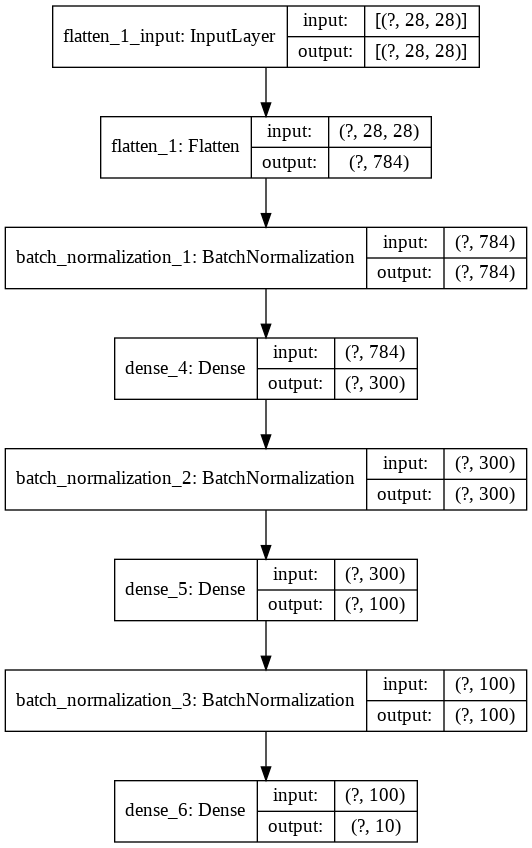

In [12]:
keras.utils.plot_model(model, show_shapes=True)

In [0]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

In [14]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 10s 174us/sample - loss: 0.8317 - accuracy: 0.7230 - val_loss: 0.5517 - val_accuracy: 0.8130
Epoch 2/10
55000/55000 [==============================] - 9s 164us/sample - loss: 0.5671 - accuracy: 0.8047 - val_loss: 0.4763 - val_accuracy: 0.8388
Epoch 3/10
55000/55000 [==============================] - 9s 165us/sample - loss: 0.5129 - accuracy: 0.8213 - val_loss: 0.4416 - val_accuracy: 0.8480
Epoch 4/10
55000/55000 [==============================] - 9s 168us/sample - loss: 0.4812 - accuracy: 0.8319 - val_loss: 0.4186 - val_accuracy: 0.8540
Epoch 5/10
55000/55000 [==============================] - 9s 168us/sample - loss: 0.4567 - accuracy: 0.8396 - val_loss: 0.4044 - val_accuracy: 0.8608
Epoch 6/10
55000/55000 [==============================] - 9s 167us/sample - loss: 0.4413 - accuracy: 0.8457 - val_loss: 0.3928 - val_accuracy: 0.8624
Epoch 7/10
55000/55000 [==========================

# dense - batch norm - activation function

In [0]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dense(100, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dense(10, activation="softmax")
])

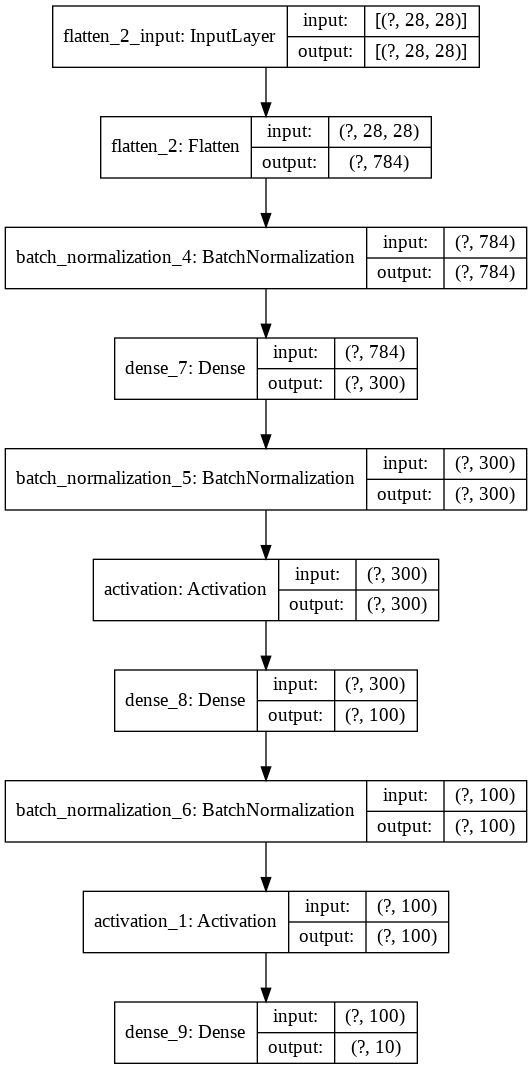

In [16]:
keras.utils.plot_model(model, show_shapes=True)

In [0]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

In [20]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 9s 165us/sample - loss: 0.4267 - accuracy: 0.8513 - val_loss: 0.3756 - val_accuracy: 0.8682
Epoch 2/10
55000/55000 [==============================] - 9s 163us/sample - loss: 0.4120 - accuracy: 0.8562 - val_loss: 0.3701 - val_accuracy: 0.8702
Epoch 3/10
55000/55000 [==============================] - 9s 163us/sample - loss: 0.4080 - accuracy: 0.8577 - val_loss: 0.3651 - val_accuracy: 0.8732
Epoch 4/10
55000/55000 [==============================] - 9s 163us/sample - loss: 0.4008 - accuracy: 0.8603 - val_loss: 0.3601 - val_accuracy: 0.8738
Epoch 5/10
55000/55000 [==============================] - 9s 165us/sample - loss: 0.3926 - accuracy: 0.8628 - val_loss: 0.3569 - val_accuracy: 0.8746
Epoch 6/10
55000/55000 [==============================] - 9s 166us/sample - loss: 0.3878 - accuracy: 0.8658 - val_loss: 0.3534 - val_accuracy: 0.8772
Epoch 7/10
55000/55000 [===========================

# 성능 비교

In [0]:
# 그냥 relu: 0.8380
# relu + dense - activation function - batch norm : 0.8690
# relu + dense - batch norm - activation function : 0.8820

# optimizers

In [21]:
# Momentum optimization

keras.optimizers.SGD(lr=0.001, momentum=0.9)

In [22]:
# Nesterov Accelerated Gradient

keras.optimizers.SGD(lr=0.001, momentum=0.9, nesterov=True)

In [23]:
# AdaGrad

keras.optimizers.Adagrad(lr=0.001)

In [24]:
# RMSProp

keras.optimizers.RMSprop(lr=0.001, rho=0.9)

In [25]:
# Adam Optimization

keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999)

# Avoiding Overfitting Through Regularization

# ℓ1  and  ℓ2  regularization

In [0]:
layer = keras.layers.Dense(100, activation="elu",
                           kernel_initializer="he_normal",
                           kernel_regularizer=keras.regularizers.l2(0.01))
# or l1(0.1) for ℓ1 regularization with a factor or 0.1
# or l1_l2(0.1, 0.01) for both ℓ1 and ℓ2 regularization, with factors 0.1 and 0.01 respectively

In [0]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="elu",
                       kernel_initializer="he_normal",
                       kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.Dense(100, activation="elu",
                       kernel_initializer="he_normal",
                       kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.Dense(10, activation="softmax",
                       kernel_regularizer=keras.regularizers.l2(0.01))
])

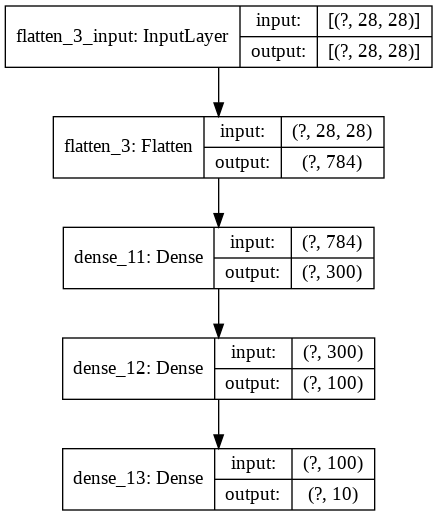

In [28]:
keras.utils.plot_model(model, show_shapes=True)

In [0]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])


In [32]:
history = model.fit(X_train, y_train, epochs=2,
                    validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/2
55000/55000 [==============================] - 13s 228us/sample - loss: 1.6214 - accuracy: 0.7781 - val_loss: 0.9736 - val_accuracy: 0.7674
Epoch 2/2
55000/55000 [==============================] - 12s 227us/sample - loss: 0.9100 - accuracy: 0.7954 - val_loss: 0.8980 - val_accuracy: 0.7986


# Dropout

In [0]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(300, activation="elu", kernel_initializer="he_normal"),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(10, activation="softmax")
])

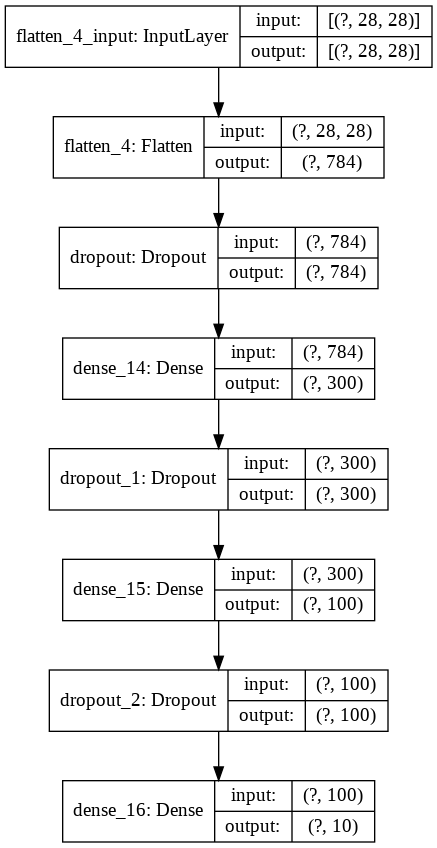

In [34]:
keras.utils.plot_model(model, show_shapes=True)

In [0]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])

In [36]:
history = model.fit(X_train, y_train, epochs=2,
                    validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/2
55000/55000 [==============================] - 12s 227us/sample - loss: 0.5767 - accuracy: 0.7883 - val_loss: 0.4206 - val_accuracy: 0.8478
Epoch 2/2
55000/55000 [==============================] - 12s 210us/sample - loss: 0.4534 - accuracy: 0.8326 - val_loss: 0.3738 - val_accuracy: 0.8590
